In [1]:
pwd()

"C:\\Users\\user"

In [2]:
using Pkg

In [3]:
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using PyCall
using MLBase

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1317
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1317
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1317
┌ Info: Precompiling HypothesisTests [09f84164-cd44-5f33-b23f-e6b0d136a0d5]
└ @ Base loading.jl:1317
┌ Info: Precompiling MLBase [f0e99cf1-93fa-52ec-9ecc-5026115318e0]
└ @ Base loading.jl:1317


- 사용 데이터 

  | Waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA

In [6]:
D = dataset("datasets", "faithful")
@show names(D)

names(D) = ["Eruptions", "Waiting"]


2-element Vector{String}:
 "Eruptions"
 "Waiting"

In [11]:
@show typeof(D)

typeof(D) = DataFrame


DataFrame

In [14]:
using DataFrames

In [21]:
describe(D)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Eruptions,3.48778,1.6,4.0,5.1,0,Float64
2,Waiting,70.8971,43,76.0,96,0,Int64


- 컬럼 추출

In [23]:
eruptions = D[! ,:Eruptions]

272-element Vector{Float64}:
 3.6
 1.8
 3.333
 2.283
 4.533
 2.883
 4.7
 3.6
 1.95
 4.35
 1.833
 3.917
 4.2
 ⋮
 4.767
 4.533
 1.85
 4.25
 1.983
 2.25
 4.75
 4.117
 2.15
 4.417
 1.817
 4.467

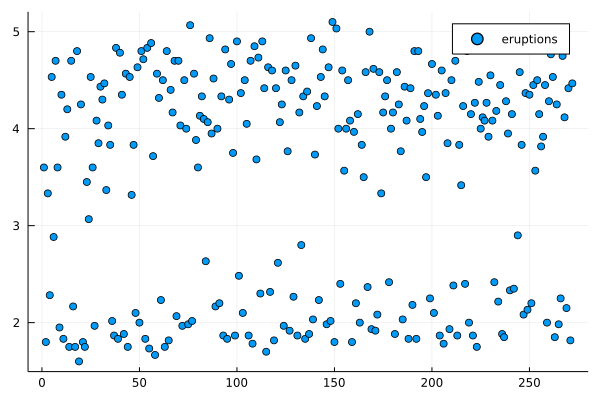

In [24]:
scatter(eruptions, label = "eruptions")

In [25]:
waittime = D[!, :Waiting]

272-element Vector{Int64}:
 79
 54
 74
 62
 85
 55
 88
 85
 51
 85
 54
 84
 78
  ⋮
 78
 84
 58
 83
 43
 60
 75
 81
 46
 90
 46
 74

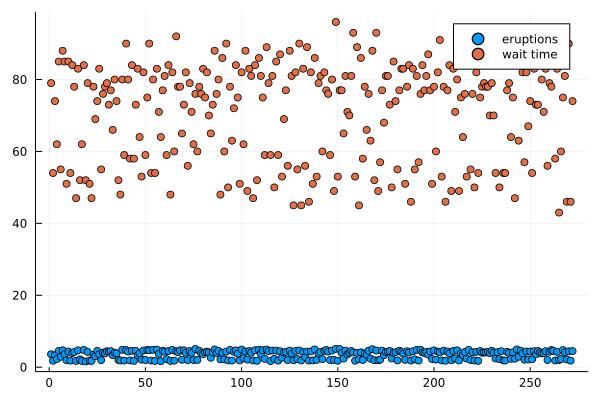

In [26]:
scatter!(waittime, label = "wait time")

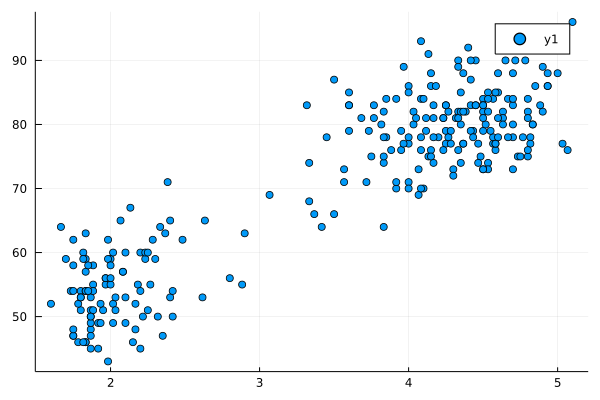

In [27]:
scatter(eruptions, waittime)

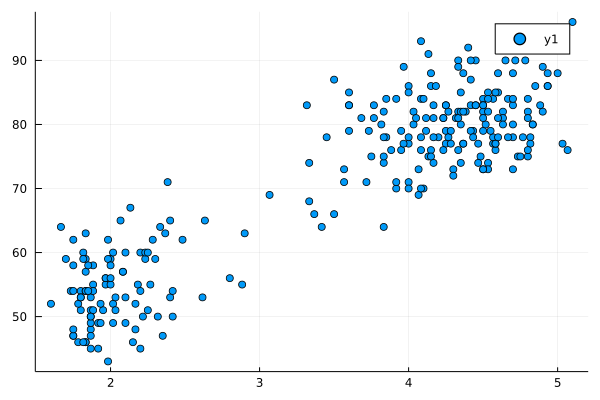

In [30]:
scatter(D[:,:Eruptions], D[:,:Waiting]) # x, y를 구분하여 지정 필요

In [31]:
scatter(D)

LoadError: Cannot convert DataFrame to series data for plotting

### Statistics plots

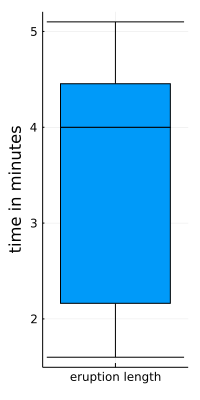

In [32]:
boxplot(["eruption length"], 
        eruptions,
        legend = false,
        size = (200, 400),
        whisker_width = 1,
        ylabel = "time in minutes")

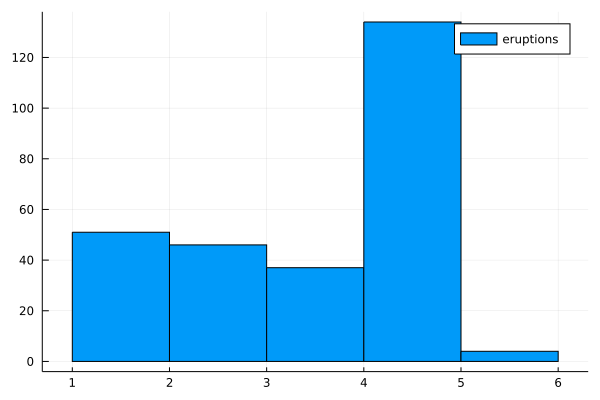

In [33]:
# Histogram
histogram(eruptions, label = "eruptions")

In [34]:
?histogram

search: histogram histogram! Histogram histogram2d histogram2d! ea_histogram



```
histogram(x)
histogram!(x)
```

Plot a histogram.

# Arguments

  * `x`: AbstractVector of values to be binned
  * `bins`: Integer, NTuple{2,Integer}, AbstractVector or          Symbol. Default is :auto (the Freedman-Diaconis rule). For          histogram-types, defines the approximate number of bins to aim for,          or the auto-binning algorithm to use (:sturges,          :sqrt, :rice, :scott or :fd). For fine-grained control          pass a Vector of break values, e.g. `range(minimum(x),          stop = maximum(x), length = 25)`
  * `weights`: Vector of weights for the values in `x`, for weighted bin counts
  * `normalize`: Bool or Symbol. Histogram normalization mode.               Possible values are: false/:none (no normalization,               default), true/:pdf (normalize to a discrete               Probability Density Function, where the total area of the               bins is 1), :probability (bin heights sum to 1)               and :density (the area of each bin, rather than               the height, is equal to the counts - useful for               uneven bin sizes).
  * `bar_position`: Symbol.  Choose from `:overlay` (default),                  `:stack`.  (warning: May not be implemented fully)
  * `bar_width`: nothing or Number. Width of bars in data               coordinates. When nothing, chooses based on x (or y when               `orientation = :h`).
  * `bar_edges`: Bool.  Align bars to edges (true), or centers               (the default)?
  * `orientation`: Symbol.  Horizontal or vertical orientation                 for bar types.  Values `:h`, `:hor`,                 `:horizontal` correspond to horizontal (sideways,                 anchored to y-axis), and `:v`, `:vert`, and                 `:vertical` correspond to vertical (the default).

# Example

```julia-repl
julia> histogram([1,2,1,1,4,3,8],bins=0:8)
julia> histogram([1,2,1,1,4,3,8],bins=0:8,weights=weights([4,7,3,9,12,2,6]))
```


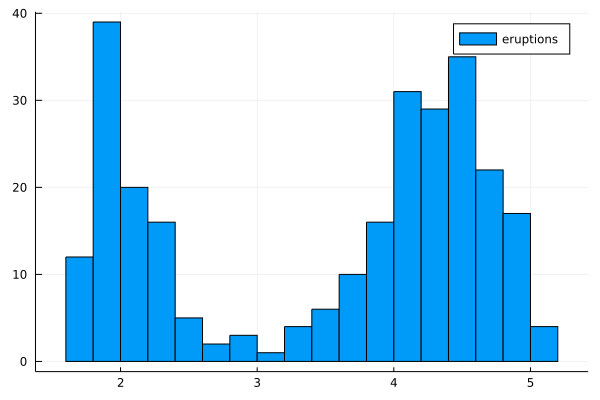

In [35]:
histogram(eruptions, bins = :sqrt, label = "eruptions")

### Kernel density estimates

- KernelDensity.jl 패키지 사용

In [36]:
p = kde(eruptions)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}(0.2608918621442271:0.0030181808870110138:6.439108137855772, [1.1161139442217305e-5, 1.1244427155304715e-5, 1.1344179473224414e-5, 1.146054328619861e-5, 1.1593684794655723e-5, 1.1743789689266926e-5, 1.1911063348919726e-5, 1.2095731053138326e-5, 1.2298038211913664e-5, 1.2518250611666393e-5  …  1.1215022627797389e-5, 1.113759304488017e-5, 1.1076192604056456e-5, 1.1030781609218734e-5, 1.1001338720893414e-5, 1.0987860983070058e-5, 1.0990363864678623e-5, 1.1008881316295835e-5, 1.1043465842321826e-5, 1.1094188587988663e-5])

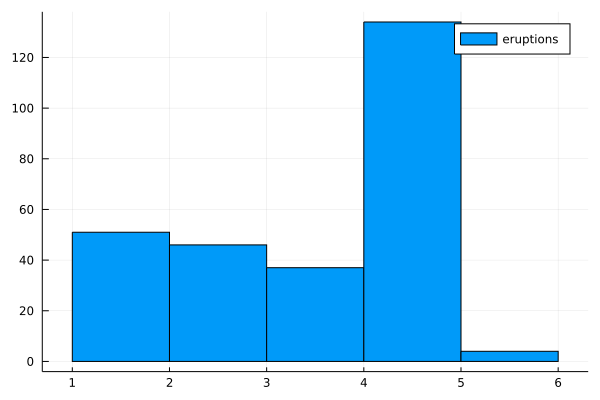

In [42]:
histogram(eruptions, label = "eruptions")

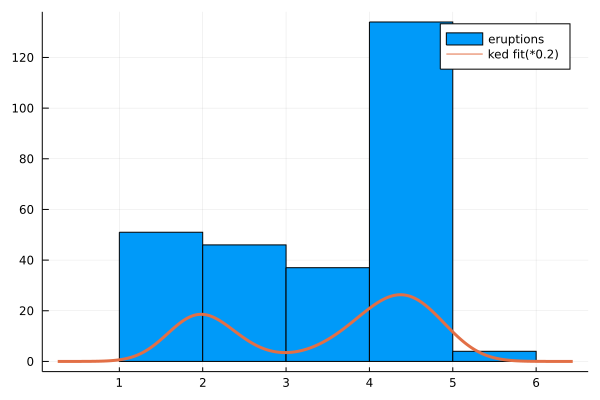

In [43]:
plot!(p.x, p.density .* length(eruptions) .* 0.2, 
      linewidth = 3,
      color = 2,
      label = "ked fit(*0.2)") 
# nb of elements*bin width

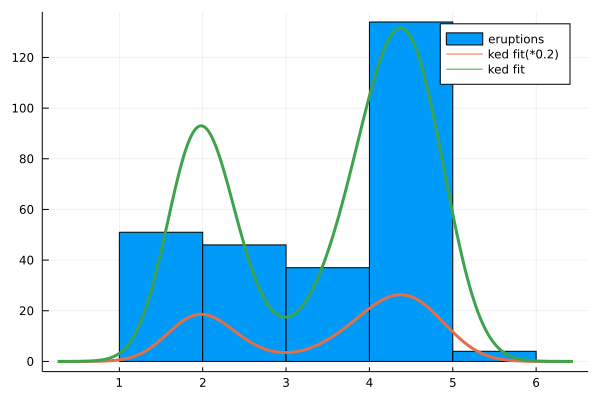

In [44]:
plot!(p.x, p.density .* length(eruptions), 
      linewidth = 3,
      color = 3,
      label = "ked fit") 
# nb of elements*bin width

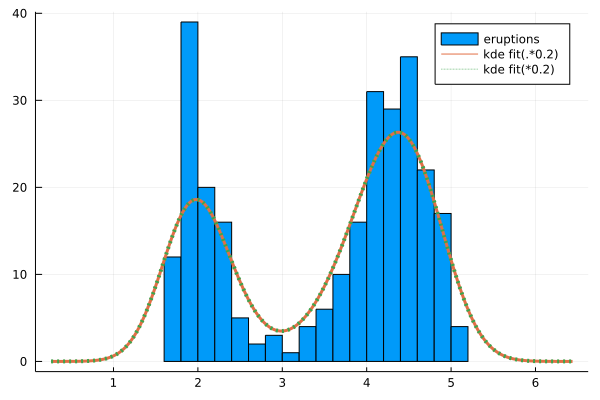

In [65]:
histogram(eruptions, bins = :sqrt, label = "eruptions")
plot!(p.x, p.density .* length(eruptions) .* 0.2,
      linewidth = 3,
      color = 2,
      label = "kde fit(.*0.2)")
plot!(p.x, p.density * length(eruptions) * 0.2,
      linewidth = 4,
      color = 3,
      linestyle = :dot,
      label = "kde fit(*0.2)")


In [53]:
?plot

search: plot plot! plotly plot3d Plots plot3d! plotlyjs plotattr plotarea



The main plot command. Use `plot` to create a new plot object, and `plot!` to add to an existing one:

```
    plot(args...; kw...)                  # creates a new plot window, and sets it to be the current
    plot!(args...; kw...)                 # adds to the `current`
    plot!(plotobj, args...; kw...)        # adds to the plot `plotobj`
```

There are lots of ways to pass in data, and lots of keyword arguments... just try it and it will likely work as expected. When you pass in matrices, it splits by columns. To see the list of available attributes, use the `plotattr([attr])` function, where `attr` is the symbol `:Series`, `:Subplot`, `:Plot`, or `:Axis`. Pass any attribute to `plotattr` as a String to look up its docstring, e.g., `plotattr("seriestype")`.


If we want the histogram and the kernel density graph to be aligned we need to remember that the "density contribution" of every point added to one of these histograms is `1/(nb of elements)*bin width`.

### 확률 분포 확인 

- 정규분포 (종모양 그래프)

In [69]:
myrandomvector = randn(100_000)

100000-element Vector{Float64}:
  0.20143098576203594
  0.6983484343930416
  0.08824480654530237
  3.1037011271050763
 -0.7195790113978777
 -0.9044880793680602
  0.016215607100753437
 -0.5447028046638706
 -0.6969234883778715
 -0.4510173500872886
 -0.29499584287181146
 -1.05947897080473
  0.12490699813026249
  ⋮
 -0.11311144068683215
  0.6756672319085869
  1.2641525569268324
 -0.16570539727077288
 -0.4445118436181342
 -0.6889471890554797
  1.5219743944662454
 -1.5325514992473217
 -0.7528603709162437
  0.7922008010009408
 -0.7949476391499692
 -0.4105605119075332

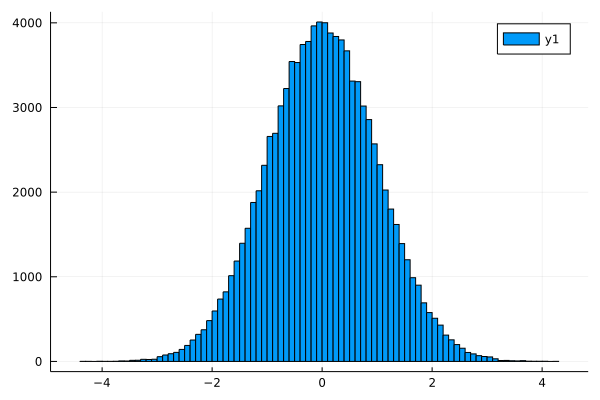

In [70]:
histogram(myrandomvector)

In [72]:
p2 = kde(myrandomvector)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}(-4.7236326092510135:0.004554495028385898:4.59941871385492, [2.7130686641729795e-8, 2.8196769419341905e-8, 3.035530735107095e-8, 3.366753861810956e-8, 3.822639974004893e-8, 4.415796439616315e-8, 5.1623350261209566e-8, 6.082108289229282e-8, 7.198990639722957e-8, 8.541202511924695e-8  …  8.523812725070266e-8, 7.185436512588059e-8, 6.071605216815754e-8, 5.154262237763024e-8, 4.4096673633767236e-8, 3.8180784883538876e-8, 3.363475548079364e-8, 3.033328360843232e-8, 2.8184097953468795e-8, 2.712655186544108e-8])

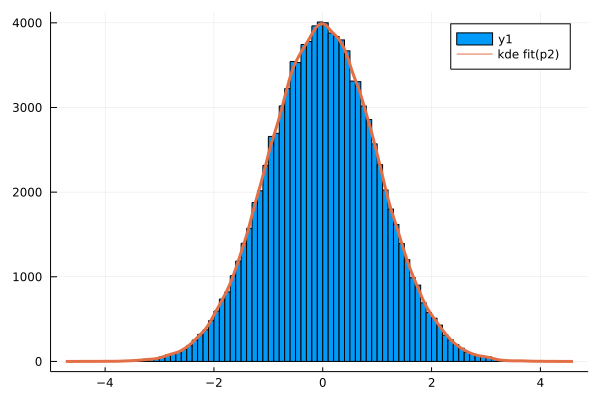

In [73]:
plot!(p2.x, p2.density .*length(myrandomvector).*0.1,
      linewidth = 3, 
      color = 2, 
      label = "kde fit(p2)") # nb of element * bin width

### Probability distributions

- 다른 방법으로 Distributions 패키지 사용, 확률분포를 선택하고 랜덤 넘버를 그림

In [75]:
d = Normal()

Normal{Float64}(μ=0.0, σ=1.0)

In [76]:
?Normal

search: Normal normalize NormalCanon normalize! normalize_hue



```
Normal(μ,σ)
```

The *Normal distribution* with mean `μ` and standard deviation `σ≥0` has probability density function

$$
f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}
\exp \left( - \frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

Note that if `σ == 0`, then the distribution is a point mass concentrated at `μ`. Though not technically a continuous distribution, it is allowed so as to account for cases where `σ` may have underflowed, and the functions are defined by taking the pointwise limit as $σ → 0$.

```julia
Normal()          # standard Normal distribution with zero mean and unit variance
Normal(mu)        # Normal distribution with mean mu and unit variance
Normal(mu, sig)   # Normal distribution with mean mu and variance sig^2

params(d)         # Get the parameters, i.e. (mu, sig)
mean(d)           # Get the mean, i.e. mu
std(d)            # Get the standard deviation, i.e. sig
```

External links

  * [Normal distribution on Wikipedia](http://en.wikipedia.org/wiki/Normal_distribution)


In [77]:
params(d)

(0.0, 1.0)

In [78]:
myrandomvector2 = rand(d, 100_000)

100000-element Vector{Float64}:
 -1.481397480217861
  0.541031748073107
  1.2370468884975605
 -1.179984828734683
  0.5498330997959966
  0.20228023595787842
  2.123034976722195
  0.8876110027073724
  0.04712696607533228
  0.20217149340271076
  1.0773609038718872
  0.7508433215257536
 -1.5128480398191333
  ⋮
 -0.015797552848326117
  1.4311451961453705
  0.7730037154532813
 -1.3022227420808332
  0.9135485022951473
  1.1413229282359483
  1.5397399689191924
  1.610565092682355
  0.18607973837041414
 -1.9201867152838001
  0.1221022667378388
 -0.004560108443786445

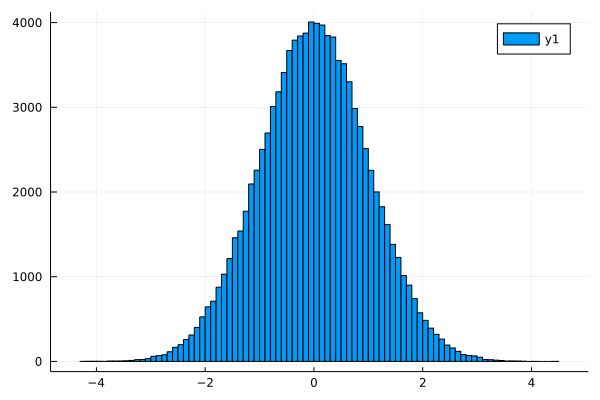

In [92]:
histogram(myrandomvector2)

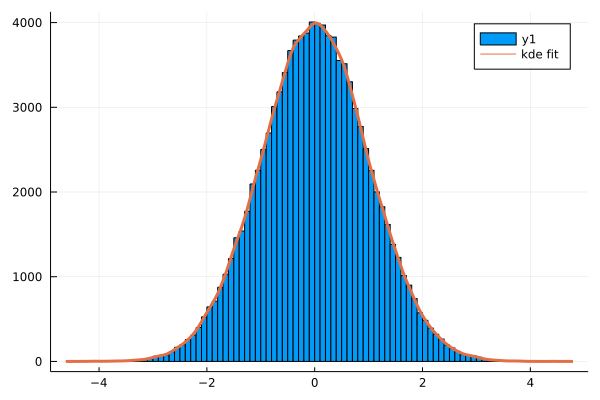

In [93]:
p = kde(myrandomvector2)
plot!(p.x, p.density .* length(myrandomvector2) .*0.1, 
      linewidth = 3,
      color = 2,
      label = "kde fit") # nb of elements * bin width

In [88]:
b = Binomial(40)

Binomial{Float64}(n=40, p=0.5)

In [94]:
myrandomvector3 = rand(b, 100_000)

100000-element Vector{Int64}:
 18
 17
 24
 19
 19
 21
 25
 18
 24
 27
 23
 22
 18
  ⋮
 19
 20
 20
 20
 26
 13
 17
 16
 19
 18
 19
 18

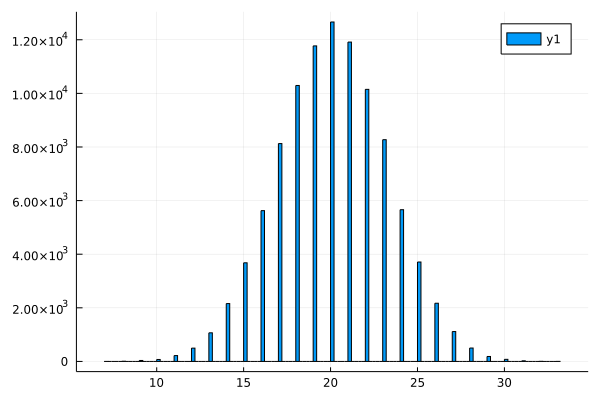

In [95]:
histogram(myrandomvector3)

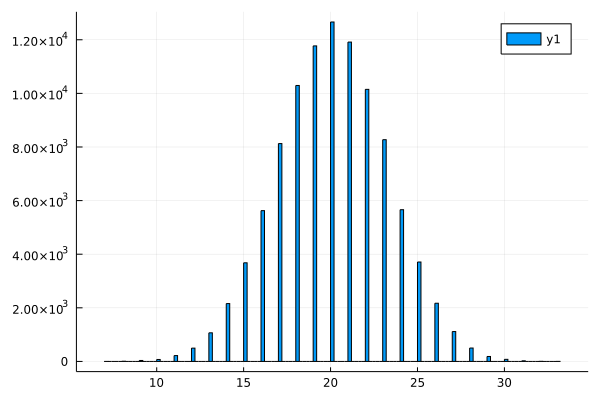

In [96]:
histogram(myrandomvector3)

In [101]:
p3 = kde(myrandomvector3)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}(5.925373134328359:0.013751467382190172:34.07462686567164, [1.3120516104137003e-8, 1.2716339273244337e-8, 1.2820640965527375e-8, 1.3431363035665278e-8, 1.456101619834449e-8, 1.6236662833679638e-8, 1.8500124598919143e-8, 2.140840364706076e-8, 2.5034308515081705e-8, 2.946727119257364e-8  …  5.7237462240330994e-8, 4.793360192448248e-8, 4.013787313107697e-8, 3.3647619350485325e-8, 2.8288555329811227e-8, 2.391224333993247e-8, 2.0393816191344172e-8, 1.7629953540446164e-8, 1.553711741555941e-8, 1.4050047511711405e-8])

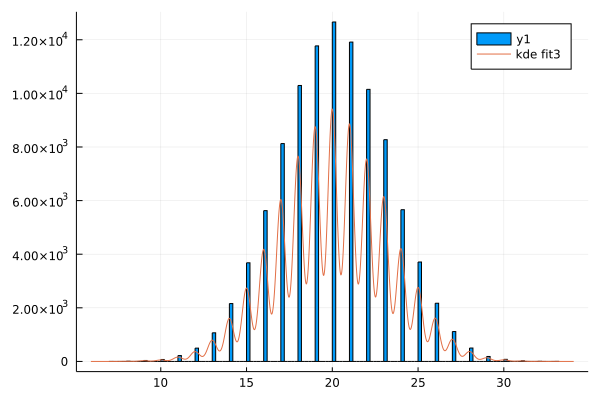

In [102]:
plot!(p3.x, p3.density .* length(myrandomvector3) .*0.5, 
      color = 2,
      label = "kde fit3") # nb of elements * bin width

- Next, we will try to fit a given set of numbers to a distribution.

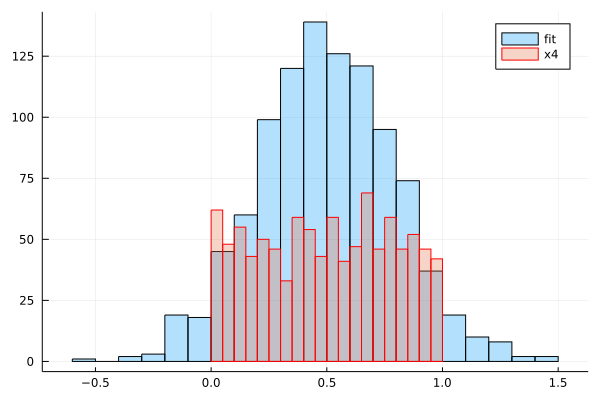

In [104]:
x4 = rand(1000)
d4 = fit(Normal, x4)
mrv4 = rand(d4, 1000) #myrandomvector -> mrv
histogram(mrv4, nbins = 20, fillalpha = 0.3, label = "fit")
histogram!(x4, nbins = 20, linecolor = :red, fillalpha = 0.3, label = "x4")

In [105]:
params(d4)

(0.4955259656856057, 0.28837389052552354)

In [108]:
mean(x4)

0.4955259656856061

In [109]:
std(x4)

0.288518185701191

In [110]:
d4

Normal{Float64}(μ=0.4955259656856057, σ=0.28837389052552354)

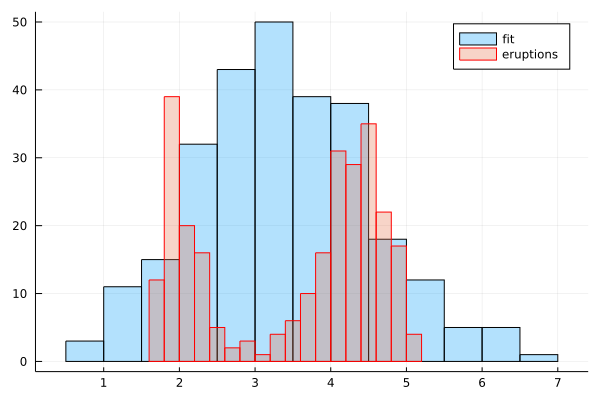

In [112]:
x5 = eruptions
d5 = fit(Normal, x5)
mrv5 = rand(d5, length(x5))
histogram(mrv5, nbins = 20, fillalpha = 0.3, label = "fit")
histogram!(x5, nbins = 20, linecolor = :red, fillalpha = 0.3, label = "eruptions")

In [113]:
names(Distributions)

225-element Vector{Symbol}:
 :AbstractMixtureModel
 :AbstractMvNormal
 :Arcsine
 :Bernoulli
 :Beta
 :BetaBinomial
 :BetaPrime
 :Binomial
 :Biweight
 :Categorical
 :Cauchy
 :Chernoff
 :Chi
 ⋮
 :sqmahal
 :sqmahal!
 :std
 :stdlogx
 :succprob
 :suffstats
 :support
 :truncated
 :var
 :varlogx
 :wsample
 :wsample!

In [115]:
varinfo(Distributions) 
# 0.대 버전에서는 whos로 사용하였지만 ,1.0 이후부터는 varinfo로 사용

| name                               |      size | summary                      |
|:---------------------------------- | ---------:|:---------------------------- |
| AbstractMixtureModel               | 200 bytes | UnionAll                     |
| AbstractMvNormal                   | 172 bytes | DataType                     |
| Arcsine                            |  40 bytes | UnionAll                     |
| Bernoulli                          |  40 bytes | UnionAll                     |
| Beta                               |  40 bytes | UnionAll                     |
| BetaBinomial                       |  40 bytes | UnionAll                     |
| BetaPrime                          |  40 bytes | UnionAll                     |
| Binomial                           |  40 bytes | UnionAll                     |
| Biweight                           |  40 bytes | UnionAll                     |
| Categorical                        |  80 bytes | UnionAll                     |
| Cauchy                             |  40 bytes | UnionAll                     |
| Chernoff                           | 172 bytes | DataType                     |
| Chi                                |  40 bytes | UnionAll                     |
| Chisq                              |  40 bytes | UnionAll                     |
| Continuous                         | 172 bytes | DataType                     |
| ContinuousDistribution             |  40 bytes | UnionAll                     |
| ContinuousMatrixDistribution       | 196 bytes | DataType                     |
| ContinuousMultivariateDistribution | 196 bytes | DataType                     |
| ContinuousUnivariateDistribution   | 196 bytes | DataType                     |
| Cosine                             |  40 bytes | UnionAll                     |
| DiagNormal                         | 220 bytes | DataType                     |
| DiagNormalCanon                    | 228 bytes | DataType                     |
| Dirac                              |  40 bytes | UnionAll                     |
| Dirichlet                          | 120 bytes | UnionAll                     |
| DirichletMultinomial               |  40 bytes | UnionAll                     |
| Discrete                           | 172 bytes | DataType                     |
| DiscreteDistribution               |  40 bytes | UnionAll                     |
| DiscreteMatrixDistribution         | 196 bytes | DataType                     |
| DiscreteMultivariateDistribution   | 196 bytes | DataType                     |
| DiscreteNonParametric              | 160 bytes | UnionAll                     |
| DiscreteUniform                    | 204 bytes | DataType                     |
| DiscreteUnivariateDistribution     | 196 bytes | DataType                     |
| Distribution                       |  80 bytes | UnionAll                     |
| Distributions                      | 1.769 MiB | Module                       |
| DoubleExponential                  |  40 bytes | UnionAll                     |
| EdgeworthMean                      |  80 bytes | UnionAll                     |
| EdgeworthSum                       |  80 bytes | UnionAll                     |
| EdgeworthZ                         |  80 bytes | UnionAll                     |
| Epanechnikov                       |  40 bytes | UnionAll                     |
| Erlang                             |  40 bytes | UnionAll                     |
| Estimator                          | 120 bytes | UnionAll                     |
| Exponential                        |  40 bytes | UnionAll                     |
| FDist                              |  40 bytes | UnionAll                     |
| FisherNoncentralHypergeometric     |  40 bytes | UnionAll                     |
| Frechet                            |  40 bytes | UnionAll                     |
| FullNormal                         | 220 bytes | DataType                     |
| FullNormalCanon                    | 228 bytes | DataType                     |
| Gamma                              |  40 bytes | UnionAll                     |
| GeneralizedExtremeValue            |  40 bytes | UnionAll                     |
| GeneralizedPareto                  |  40 bytes | UnionAll                     |
| Geometric                          |  40 bytes | UnionAll                     |
| Gumbel                             |  40 bytes | UnionAll                     |
| Hypergeometric                     | 204 bytes | DataType                     |
| InverseGamma                       |  40 bytes | UnionAll                     |
| InverseGaussian                    |  40 bytes | UnionAll                     |
| InverseWishart                     | 120 bytes | UnionAll                     |
| IsoNormal                          | 220 bytes | DataType                     |
| IsoNormalCanon                     | 228 bytes | DataType                     |
| KSDist                             | 188 bytes | DataType                     |
| KSOneSided                         | 188 bytes | DataType                     |
| Kolmogorov                         | 172 bytes | DataType                     |
| LKJ                                |  80 bytes | UnionAll                     |
| Laplace                            |  40 bytes | UnionAll                     |
| Levy                               |  40 bytes | UnionAll                     |
| LocationScale                      |  80 bytes | UnionAll                     |
| LogNormal                          |  40 bytes | UnionAll                     |
| Logistic                           |  40 bytes | UnionAll                     |
| LogitNormal                        |  40 bytes | UnionAll                     |
| MLEstimator                        | 120 bytes | UnionAll                     |
| MatrixBeta                         |  80 bytes | UnionAll                     |
| MatrixDistribution                 |  40 bytes | UnionAll                     |
| MatrixFDist                        | 240 bytes | UnionAll                     |
| MatrixNormal                       | 240 bytes | UnionAll                     |
| MatrixReshaped                     |  80 bytes | UnionAll                     |
| MatrixTDist                        | 240 bytes | UnionAll                     |
| Matrixvariate                      | 172 bytes | DataType                     |
| MixtureModel                       | 240 bytes | UnionAll                     |
| Multinomial                        |  80 bytes | UnionAll                     |
| Multivariate                       | 172 bytes | DataType                     |
| MultivariateDistribution           |  40 bytes | UnionAll                     |
| MultivariateMixture                | 160 bytes | UnionAll                     |
| MultivariateNormal                 | 200 bytes | UnionAll                     |
| MvLogNormal                        | 200 bytes | UnionAll                     |
| MvNormal                           | 200 bytes | UnionAll                     |
| MvNormalCanon                      | 200 bytes | UnionAll                     |
| MvNormalKnownCov                   |  80 bytes | UnionAll                     |
| MvTDist                            | 236 bytes | DataType                     |
| NegativeBinomial                   |  40 bytes | UnionAll                     |
| NonMatrixDistribution              |  96 bytes | Union                        |
| NoncentralBeta                     |  40 bytes | UnionAll                     |
| NoncentralChisq                    |  40 bytes | UnionAll                     |
| NoncentralF                        |  40 bytes | UnionAll                     |
| NoncentralHypergeometric           |  40 bytes | UnionAll                     |
| NoncentralT                        |  40 bytes | UnionAll                     |
| Normal                             |  40 bytes | UnionAll                     |
| NormalCanon                        |  40 bytes | UnionAll                     |
| NormalInverseGaussian              |  40 bytes | UnionAll                     |
| PGeneralizedGaussian               | 120 bytes | UnionAll                     |
| Pareto                             |  40 bytes | UnionAll                     |
| Poisson                            |  40 bytes | UnionAll                     |
| PoissonBinomial                    |  40 bytes | UnionAll                     |
| Product                            | 120 bytes | UnionAll                     |
| QQPair                             | 120 bytes | UnionAll                     |
| Rayleigh                           |  40 bytes | UnionAll                     |
| RealInterval                       | 196 bytes | DataType                     |
| Sampleable                         |  80 bytes | UnionAll                     |
| Semicircle                         |  40 bytes | UnionAll                     |
| Skellam                            |  40 bytes | UnionAll                     |
| SkewNormal                         |  40 bytes | UnionAll                     |
| Soliton                            | 228 bytes | DataType                     |
| StudentizedRange                   |  40 bytes | UnionAll                     |
| SufficientStats                    | 172 bytes | DataType                     |
| SymTriangularDist                  |  40 bytes | UnionAll                     |
| TDist                              |  40 bytes | UnionAll                     |
| TriangularDist                     |  40 bytes | UnionAll                     |
| Triweight                          |  40 bytes | UnionAll                     |
| Truncated                          | 160 bytes | UnionAll                     |
| TruncatedNormal                    |   0 bytes | typeof(TruncatedNormal)      |
| Uniform                            |  40 bytes | UnionAll                     |
| Univariate                         | 172 bytes | DataType                     |
| UnivariateDistribution             |  40 bytes | UnionAll                     |
| UnivariateGMM                      | 280 bytes | UnionAll                     |
| UnivariateMixture                  | 160 bytes | UnionAll                     |
| ValueSupport                       | 172 bytes | DataType                     |
| VariateForm                        | 172 bytes | DataType                     |
| VonMises                           |  40 bytes | UnionAll                     |
| VonMisesFisher                     |  40 bytes | UnionAll                     |
| WalleniusNoncentralHypergeometric  |  40 bytes | UnionAll                     |
| Weibull                            |  40 bytes | UnionAll                     |
| Wishart                            | 160 bytes | UnionAll                     |
| ZeroMeanDiagNormal                 |  40 bytes | UnionAll                     |
| ZeroMeanDiagNormalCanon            |  40 bytes | UnionAll                     |
| ZeroMeanFullNormal                 |  40 bytes | UnionAll                     |
| ZeroMeanFullNormalCanon            |  40 bytes | UnionAll                     |
| ZeroMeanIsoNormal                  |  40 bytes | UnionAll                     |
| ZeroMeanIsoNormalCanon             |  40 bytes | UnionAll                     |
| canonform                          |   0 bytes | typeof(canonform)            |
| ccdf                               |   0 bytes | typeof(ccdf)                 |
| cdf                                |   0 bytes | typeof(cdf)                  |
| cf                                 |   0 bytes | typeof(cf)                   |
| circvar                            |   0 bytes | typeof(circvar)              |
| component                          |   0 bytes | typeof(component)            |
| components                         |   0 bytes | typeof(components)           |
| componentwise_logpdf               |   0 bytes | typeof(componentwise_logpdf) |
| componentwise_pdf                  |   0 bytes | typeof(componentwise_pdf)    |
| concentration                      |   0 bytes | typeof(concentration)        |
| convolve                           |   0 bytes | typeof(convolve)             |
| cor                                |   0 bytes | typeof(cor)                  |
| cov                                |   0 bytes | typeof(cov)                  |
| cquantile                          |   0 bytes | typeof(cquantile)            |
| dim                                |   0 bytes | typeof(dim)                  |
| dof                                |   0 bytes | typeof(dof)                  |
| entropy                            |   0 bytes | typeof(entropy)              |
| estimate                           |   0 bytes | typeof(estimate)             |
| expected_logdet                    |   0 bytes | typeof(expected_logdet)      |
| failprob                           |   0 bytes | typeof(failprob)             |
| fit                                |   0 bytes | typeof(fit)                  |
| fit_mle                            |   0 bytes | typeof(fit_mle)              |
| gradlogpdf                         |   0 bytes | typeof(gradlogpdf)           |
| hasfinitesupport                   |   0 bytes | typeof(hasfinitesupport)     |
| insupport                          |   0 bytes | typeof(insupport)            |
| invcov                             |   0 bytes | typeof(invcov)               |
| invlogccdf                         |   0 bytes | typeof(invlogccdf)           |
| invlogcdf                          |   0 bytes | typeof(invlogcdf)            |
| invscale                           |   0 bytes | typeof(invscale)             |
| isbounded                          |   0 bytes | typeof(isbounded)            |
| isleptokurtic                      |   0 bytes | typeof(isleptokurtic)        |
| islowerbounded                     |   0 bytes | typeof(islowerbounded)       |
| ismesokurtic                       |   0 bytes | typeof(ismesokurtic)         |
| isplatykurtic                      |   0 bytes | typeof(isplatykurtic)        |
| isprobvec                          |   0 bytes | typeof(isprobvec)            |
| isupperbounded                     |   0 bytes | typeof(isupperbounded)       |
| kurtosis                           |   0 bytes | typeof(kurtosis)             |
| location                           |   0 bytes | typeof(location)             |
| location!                          |   0 bytes | typeof(location!)            |
| logccdf                            |   0 bytes | typeof(logccdf)              |
| logcdf                             |   0 bytes | typeof(logcdf)               |
| logdetcov                          |   0 bytes | typeof(logdetcov)            |
| logdiffcdf                         |   0 bytes | typeof(logdiffcdf)           |
| loglikelihood                      |   0 bytes | typeof(loglikelihood)        |
| logpdf                             |   0 bytes | typeof(logpdf)               |
| logpdf!                            |   0 bytes | typeof(logpdf!)              |
| mean                               |   0 bytes | typeof(mean)                 |
| meandir                            |   0 bytes | typeof(meandir)              |
| meanform                           |   0 bytes | typeof(meanform)             |
| meanlogx                           |   0 bytes | typeof(meanlogx)             |
| median                             |   0 bytes | typeof(median)               |
| mgf                                |   0 bytes | typeof(mgf)                  |
| mode                               |   0 bytes | typeof(mode)                 |
| modes                              |   0 bytes | typeof(modes)                |
| moment                             |   0 bytes | typeof(moment)               |
| ncategories                        |   0 bytes | typeof(ncategories)          |
| ncomponents                        |   0 bytes | typeof(ncomponents)          |
| nsamples                           |   0 bytes | typeof(nsamples)             |
| ntrials                            |   0 bytes | typeof(ntrials)              |
| params                             |   0 bytes | typeof(params)               |
| params!                            |   0 bytes | typeof(params!)              |
| partype                            |   0 bytes | typeof(partype)              |
| pdf                                |   0 bytes | typeof(pdf)                  |
| probs                              |   0 bytes | typeof(probs)                |
| probval                            |   0 bytes | typeof(probval)              |
| product_distribution               |   0 bytes | typeof(product_distribution) |
| qqbuild                            |   0 bytes | typeof(qqbuild)              |
| quantile                           |   0 bytes | typeof(quantile)             |
| rate                               |   0 bytes | typeof(rate)                 |
| sample                             |   0 bytes | typeof(sample)               |
| sample!                            |   0 bytes | typeof(sample!)              |
| sampler                            |   0 bytes | typeof(sampler)              |
| scale                              |   0 bytes | typeof(scale)                |
| scale!                             |   0 bytes | typeof(scale!)               |
| shape                              |   0 bytes | typeof(shape)                |
| skewness                           |   0 bytes | typeof(skewness)             |
| span                               |   0 bytes | typeof(span)                 |
| sqmahal                            |   0 bytes | typeof(sqmahal)              |
| sqmahal!                           |   0 bytes | typeof(sqmahal!)             |
| std                                |   0 bytes | typeof(std)                  |
| stdlogx                            |   0 bytes | typeof(stdlogx)              |
| succprob                           |   0 bytes | typeof(succprob)             |
| suffstats                          |   0 bytes | typeof(suffstats)            |
| support                            |   0 bytes | typeof(support)              |
| truncated                          |   0 bytes | typeof(truncated)            |
| var                                |   0 bytes | typeof(var)                  |
| varlogx                            |   0 bytes | typeof(varlogx)              |
| wsample                            |   0 bytes | typeof(wsample)              |
| wsample!                           |   0 bytes | typeof(wsample!)             |


### Hypothesis testing

- 관련 패키지: HypothesisTests

In [116]:
?OneSampleTest

search: OneSampleTTest OneSampleZTest OneSampleADTest ExactOneSampleKSTest

Couldn't find OneSampleTest
Perhaps you meant OneSampleTTest, OneSampleZTest or OneSampleADTest


No documentation found.

Binding `OneSampleTest` does not exist.


In [117]:
?OneSampleTTest

search: OneSampleTTest OneSampleHotellingT2Test OneSampleZTest OneSampleADTest



```
OneSampleTTest(xbar::Real, stddev::Real, n::Int, μ0::Real = 0)
```

Perform a one sample t-test of the null hypothesis that `n` values with mean `xbar` and sample standard deviation `stddev`  come from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)

---

```
OneSampleTTest(v::AbstractVector{T<:Real}, μ0::Real = 0)
```

Perform a one sample t-test of the null hypothesis that the data in vector `v` comes from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)

---

```
OneSampleTTest(x::AbstractVector{T<:Real}, y::AbstractVector{T<:Real}, μ0::Real = 0)
```

Perform a paired sample t-test of the null hypothesis that the differences between pairs of values in vectors `x` and `y` come from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)


In [118]:
rmv6 = randn(1000);


In [119]:
OneSampleTTest(rmv6)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.0671445
    95% confidence interval: (0.0059, 0.1284)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0317

Details:
    number of observations:   1000
    t-statistic:              2.150734800814181
    degrees of freedom:       999
    empirical standard error: 0.0312193355673954


In [120]:
OneSampleTTest(eruptions)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          3.48778
    95% confidence interval: (3.3515, 3.624)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   272
    t-statistic:              50.39726752574924
    degrees of freedom:       271
    empirical standard error: 0.06920579744632577


### 상관계수(Correlation)

In [121]:
scipy_stats = pyimport("scipy.stats")

LoadError: PyError (PyImport_ImportModule

The Python package scipy.stats could not be imported by pyimport. Usually this means
that you did not install scipy.stats in the Python version being used by PyCall.

PyCall is currently configured to use the Julia-specific Python distribution
installed by the Conda.jl package.  To install the scipy.stats module, you can
use `pyimport_conda("scipy.stats", PKG)`, where PKG is the Anaconda
package the contains the module scipy.stats, or alternatively you can use the
Conda package directly (via `using Conda` followed by `Conda.add` etcetera).

Alternatively, if you want to use a different Python distribution on your
system, such as a system-wide Python (as opposed to the Julia-specific Python),
you can re-configure PyCall with that Python.   As explained in the PyCall
documentation, set ENV["PYTHON"] to the path/name of the python executable
you want to use, run Pkg.build("PyCall"), and re-launch Julia.

) <class 'ModuleNotFoundError'>
ModuleNotFoundError("No module named 'scipy'")


In [126]:
?pyimport_conda()

```
pyimport_conda(modulename, condapkg, [channel])
```

Returns the result of `pyimport(modulename)` if possible.   If the module is not found, and PyCall is configured to use the Conda Python distro (via the Julia Conda package), then automatically install `condapkg` via `Conda.add(condapkg)` and then re-try the `pyimport`.   Other Anaconda-based Python installations are also supported as long as their `conda` program is functioning.

If PyCall is not using Conda and the `pyimport` fails, throws an exception with an error message telling the user how to configure PyCall to use Conda for automated installation of the module.

The third argument, `channel` is an optional Anaconda "channel" to use for installing the package; this is useful for packages that are not included in the default Anaconda package listing.


In [129]:
Pkg.add("Conda")

    Updating registry at `C:\Users\user\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
    Updating `C:\Users\user\.julia\environments\v1.6\Project.toml`
  [8f4d0f93] + Conda v1.5.1
  No Changes to `C:\Users\user\.julia\environments\v1.6\Manifest.toml`
Precompiling project...
  ✓ FFTViews
  ✓ Graphics
  ✓ ColorVectorSpace
  ✓ StatsModels
  ✓ ImageCore
  ✓ RCall
  ✓ ImageMorphology
  ✓ ImageAxes
  ✓ ImageShow
  ✓ QuartzImageIO
  ✓ ImageMagick
  ✓ ImageTransformations
  ✓ ImageDistances
  ✓ ImageMetadata
  ✓ ImageContrastAdjustment
  ✓ ImageFiltering
  ✓ ImageQualityIndexes
  ✓ Images
18 dependencies successfully precompiled in 37 seconds (212 already precompiled)


In [130]:
using Conda

In [131]:
Conda.add("scipy")

┌ Info: Running `conda install -y scipy` in root environment
└ @ Conda C:\Users\user\.julia\packages\Conda\tJJuN\src\Conda.jl:128


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\.julia\conda\3

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    icc_rt-2019.0.0            |       h0cc432a_1         6.0 MB
    scipy-1.6.2                |   py38h14eb087_0        13.0 MB
    ------------------------------------------------------------
                                           Total:        19.0 MB

The following NEW packages will be INSTALLED:

  icc_rt             pkgs/main/win-64::icc_rt-2019.0.0-h0cc432a_1
  scipy              pkgs/main/win-64::scipy-1.6.2-py38h14eb087_0



icc_rt-2019.0.0      | 6.0 MB    | ########## | 100% 
scipy-1.6.2          | 13.0 MB   | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [132]:
scipy_stats = pyimport("scipy.stats")

PyObject <module 'scipy.stats' from 'C:\\Users\\user\\.julia\\conda\\3\\lib\\site-packages\\scipy\\stats\\__init__.py'>

In [133]:
@show scipy_stats.spearmanr(eruptions,waittime) # (상관계수, p-값)
@show scipy_stats.pearsonr(eruptions,waittime) # (상관계수, p-값)

scipy_stats.spearmanr(eruptions, waittime) = (0.7779720576516121, 1.989541990656138e-56)
scipy_stats.pearsonr(eruptions, waittime) = (0.900811168321813, 8.129958506616769e-100)


(0.900811168321813, 8.129958506616769e-100)

- true rho is equal 0 라는 귀무가설(즉, 상관 계수가 0이다 라는 귀무가설에 대한 검정)에 대한 테스트 결과의 P-값을 보여줌

#### R 결과 

> cor.test(faithful$eruptions, 
+          faithful$waiting, 
+          method = "p")

	Pearson's product-moment correlation

data:  faithful$eruptions and faithful$waiting
t = 34.089, df = 270, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8756964 0.9210652
sample estimates:
      cor 
0.9008112 

> cor.test(faithful$eruptions, 
+          faithful$waiting, 
+          method = "s")

	Spearman's rank correlation rho

data:  faithful$eruptions and faithful$waiting
S = 744659, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7779721 

#### Julia 함수 결과

In [122]:
corspearman(eruptions, waittime)

0.7779720576516121

In [123]:
cor(eruptions, waittime)

0.9008111683218131

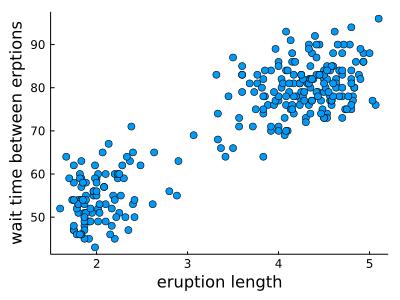

In [124]:
scatter(eruptions, 
        waittime, 
        xlabel = "eruption length",
        ylabel = "wait time between erptions", 
        legend = false,
        grid = false,
        size = (400, 300))

#### 그렇다면 줄리아에서 할 수 있는 correlation test는?

- Test for Association/Correlation Between Paired Samples

In [134]:
cortest(x,y) =
    if length(x) == length(y)
        2 * ccdf(Normal(), atanh(abs(cor(x, y))) * sqrt(length(x) - 3))
    else
        error("x and y have different lengths")
    end

cortest (generic function with 1 method)

In [135]:
cortest(eruptions, waittime) # fisher transformation 이용 

1.4915638160238977e-129

### AUC and Confusion Matrix

- MLBase 패키지를 이요해 AUC 점수와 Confutions Matrix를 구함

In [137]:
gt = [1, 1, 1, 1, 1, 1, 1, 2];
pred = [1, 1, 2, 2, 1, 1, 1, 1];

In [138]:
C = confusmat(2, gt, pred)

2×2 Matrix{Int64}:
 5  2
 1  0

In [139]:
C./sum(C, dims = 2) # normalize per class

2×2 Matrix{Float64}:
 0.714286  0.285714
 1.0       0.0

In [140]:
sum(diag(C))/length(gt) # compute correct rate from confusion matrix

0.625

In [141]:
correctrate(gt, pred) # compute correct rate from confusion matrix

0.625

In [143]:
sum(diag(C))/sum(C) # compute correct rate from confusion matrix

0.625

In [145]:
gt = [1, 1, 1, 1, 1, 1, 1, 0];
pred = [1, 1, 0, 0, 1, 1, 1, 1];

In [146]:
ROC = MLBase.roc(gt, pred)

ROCNums{Int64}
  p = 7
  n = 1
  tp = 5
  tn = 0
  fp = 1
  fn = 2


In [147]:
recall(ROC)

0.7142857142857143

In [148]:
precision(ROC)

0.8333333333333334